# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# ======================================
# 1. IMPORT LIBRARY
# ======================================

import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Untuk simpan preprocessor
import pickle


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# ============================
# 2. LOAD DATASET
# ============================

import kagglehub

# Download dataset dari Kaggle
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
print("Dataset path:", path)

# Cek file yang tersedia
import os
os.listdir(path)


100%|██████████| 368k/368k [00:00<00:00, 538kB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1


['credit_risk_dataset.csv']

In [27]:
#Menampilkan data
df = pd.read_csv(path + "/credit_risk_dataset.csv")
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [28]:
#Menampilkan informasi data
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [29]:
#Menampilkan jumlah baris dan kolom
print(df.shape)

(32581, 12)


In [30]:
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [31]:
#Cek jumlah missing value
print("\nJumlah missing value tiap kolom ")
df.isnull().sum()


Jumlah missing value tiap kolom 


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [32]:
#Cek jumlah nilai unik
df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [33]:
# Distribusi target
print("\nDistribusi Target loan_status:")
print(df["loan_status"].value_counts())


Distribusi Target loan_status:
loan_status
0    25473
1     7108
Name: count, dtype: int64


In [34]:
df.groupby('loan_status')['person_income'].mean().rename(index = {0: 'Non default', 1: 'Default'})

,person_income
loan_status,
Non default,70804.361559
Default,49125.652223


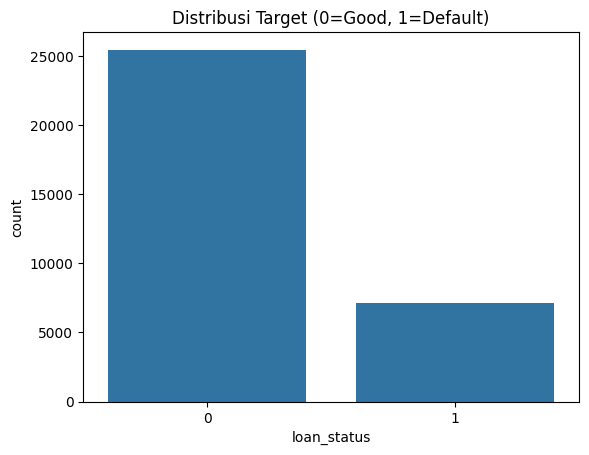

In [35]:
sns.countplot(data=df, x="loan_status")
plt.title("Distribusi Target (0=Good, 1=Default)")
plt.show()

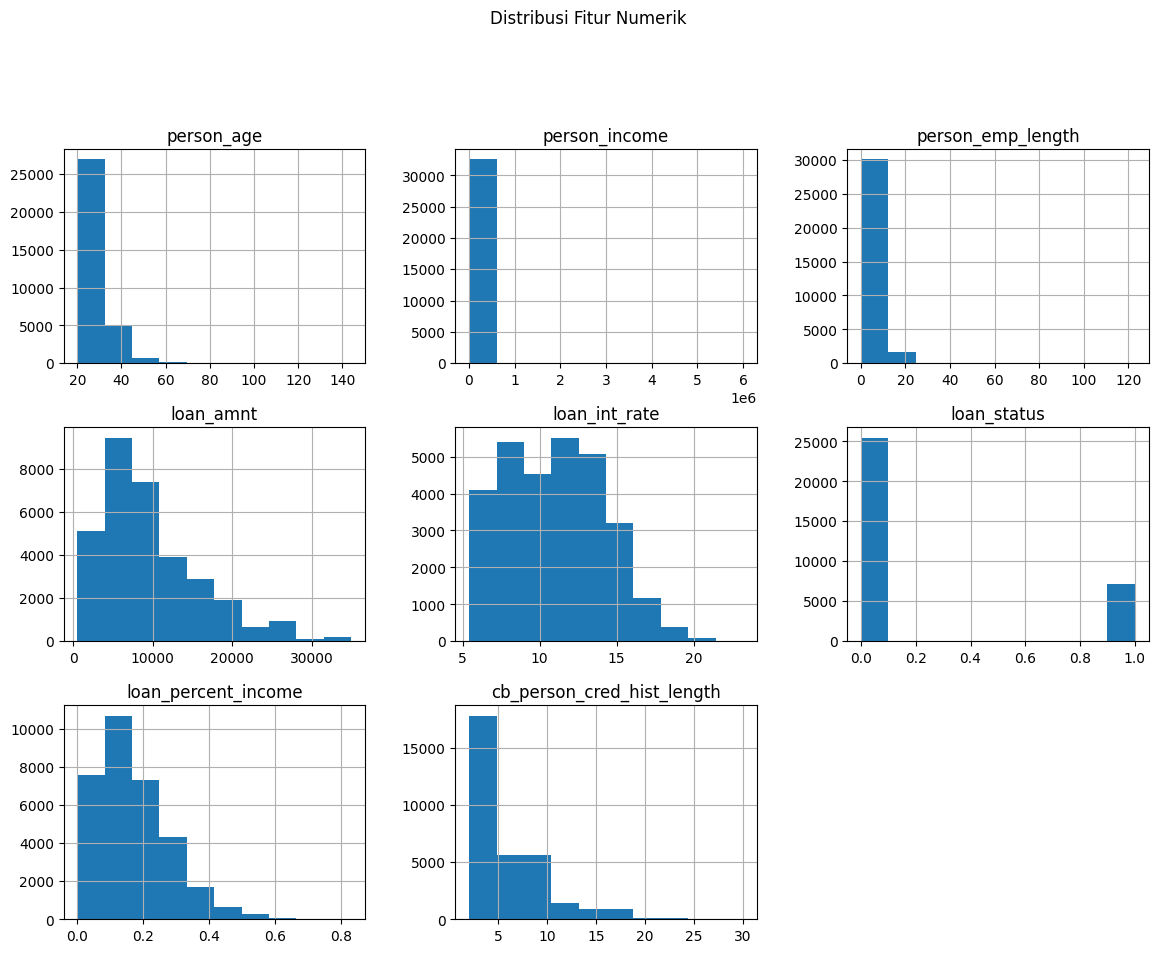

In [36]:
df.hist(figsize=(14, 10))
plt.suptitle("Distribusi Fitur Numerik", y=1.02)
plt.show()


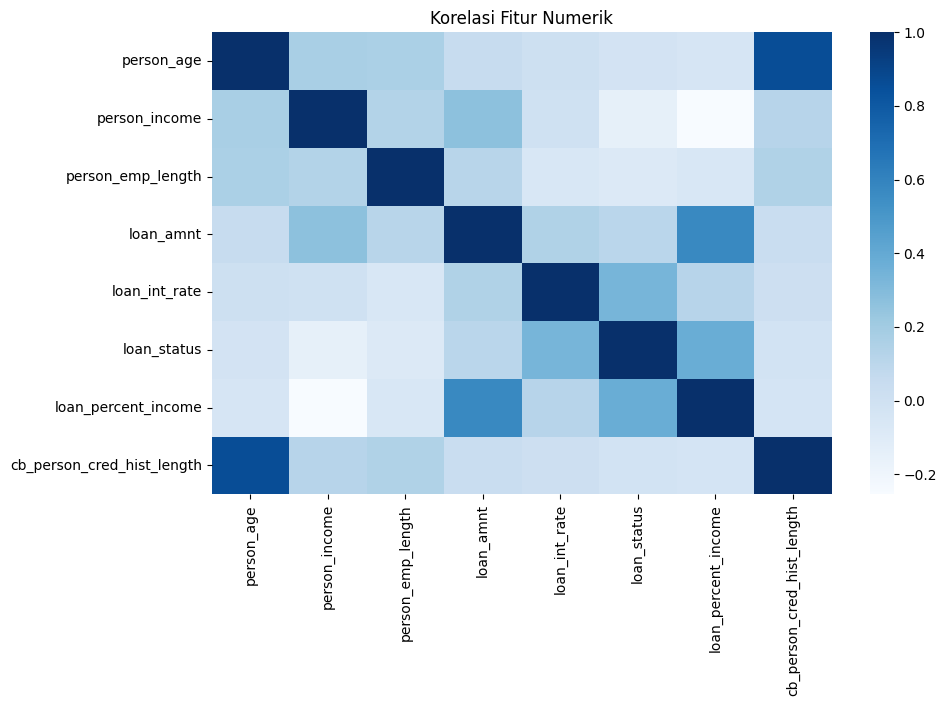

In [37]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), cmap="Blues")
plt.title("Korelasi Fitur Numerik")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [38]:
#Menangani Missing Value (hapus missing value)
df = df.dropna()

In [39]:
#Menangani duplicates (Halus duplicates)
df = df.drop_duplicates()

In [41]:
#Pemisahan Fitur (X) dan Taget (y)
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [42]:
#Menentukan Kolom Numerik dan Kategorikal
numeric_cols = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length"
]
categorical_cols = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file"
]

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [53]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print("Total data train :", len(X_train))
print("Total data test  :", len(X_test))


Total data train : 22800
Total data test  : 5701


In [54]:
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

print("Preprocessor berhasil disimpan!")


Preprocessor berhasil disimpan!


In [55]:
import shutil

shutil.copy(
    "/root/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1/credit_risk_dataset.csv",
    "/content/credit_risk_dataset.csv"
)


'/content/credit_risk_dataset.csv'